In [3]:
#ORF 435, Final Project Nicholas Kim
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from scipy.optimize import linprog
#from cvxpy import *
from math import log
import matplotlib.pyplot as plt

In [2]:
#Problem 1
salary=250000
salary = salary * (1.022**(67-30))

def expectedSavings(lastSalary, lifeExpectancy, percentSpending):
    r = 1.032
    spending = percentSpending*lastSalary
    expectedSavings = 0
    for i in range(0,lifeExpectancy):
        val = spending/(r**(i+1))
        expectedSavings += val
        spending = spending * 1.022
    return expectedSavings
    
expectedSavings(salary, 17, 0.70)

5972470.470970963

In [33]:
#Problem 2
def p2f(x):
    if (type(x) == type("string")):
        if ('%' in x):
            return float(x.strip('%'))/100
        if (any(i.isdigit() for i in x)):
            return float(x)
    return x

dfFactors = pd.read_csv(r'C:\Users\Nick Kim\Documents\Nicholas Kim\School\School Semesters\Fall 2019 Semester\Risk Management\HW8\HW8_factors.csv')
dfAssets = pd.read_csv(r'C:\Users\Nick Kim\Documents\Nicholas Kim\School\School Semesters\Fall 2019 Semester\Risk Management\HW8\HW8_assets.csv')

dfFactorsNormal = dfFactors[dfFactors['Regime'] == 1]
dfFactorsCrash = dfFactors[dfFactors['Regime'] == -1]
dfAssetsNormal = dfAssets[dfAssets['Regime'] == 1]
dfAssetsCrash = dfAssets[dfAssets['Regime'] == -1]

In [34]:
dfNL = pd.read_csv(r'C:\Users\Nick Kim\Documents\Nicholas Kim\School\School Semesters\Fall 2019 Semester\Risk Management\HW8\HW8_normalLoadings.csv')
dfCL = pd.read_csv(r'C:\Users\Nick Kim\Documents\Nicholas Kim\School\School Semesters\Fall 2019 Semester\Risk Management\HW8\HW8_crashLoadings.csv')

In [35]:
dfNL.drop(['Unnamed: 7'], axis = 1, inplace = True)
dfNL.fillna(value = 0, inplace = True)
dfNL = dfNL.applymap(p2f)
dfNL['Expected Return'].iloc[0] = 1
dfCL.drop(['Unnamed: 7'], axis = 1, inplace = True)
dfCL.fillna(value = 0, inplace = True)
dfCL = dfCL.applymap(p2f)
dfCL['Expected Return'].iloc[0] = 1

In [36]:
assets = ['US Equities', 'US Treasuries', 'High Yield ', 'Corp Bonds', 'Real Estate','Commodities']

expectedAssetReturnsNormal = []
expectedAssetReturnsCrash = []
for asset in assets:
    expectedAssetReturnsNormal.append(np.dot(dfNL['Expected Return'], dfNL[asset]))
    expectedAssetReturnsCrash.append(np.dot(dfCL['Expected Return'], dfCL[asset]))

dfProblem2 = pd.DataFrame(columns = ['Regime'] + (assets))
dfProblem2.loc[0] = ["Normal"] + expectedAssetReturnsNormal
dfProblem2.loc[1] = ["Crash"] + expectedAssetReturnsCrash
print("Expected Asset Returns")
dfProblem2

Expected Asset Returns


,Regime,US Equities,US Treasuries,High Yield,Corp Bonds,Real Estate,Commodities
0,Normal,0.0112,0.003,0.008,0.0046,0.0084,0.0061
1,Crash,-0.0270,0.008,-0.016,0.0029,-0.0179,-0.0080


In [37]:
dfAssetsNormal.cov()

,US Equities,US Treasuries,High Yield,Corp Bonds,Real Estate,Commodities,Regime
US Equities,0.001279,0.000040,0.000340,0.000127,0.000729,0.000355,0.0
US Treasuries,0.000040,0.000166,0.000041,0.000157,0.000072,-0.000053,0.0
High Yield,0.000340,0.000041,0.000321,0.000134,0.000411,0.000153,0.0
Corp Bonds,0.000127,0.000157,0.000134,0.000210,0.000202,0.000008,0.0
Real Estate,0.000729,0.000072,0.000411,0.000202,0.001636,0.000111,0.0
Commodities,0.000355,-0.000053,0.000153,0.000008,0.000111,0.002799,0.0
Regime,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [38]:
dfAssetsCrash.cov()

,US Equities,US Treasuries,High Yield,Corp Bonds,Real Estate,Commodities,Regime
US Equities,0.004245,-0.000339,0.001721,0.000276,0.004916,0.001744,0.0
US Treasuries,-0.000339,0.000284,-0.000140,0.000197,-0.000205,-0.000250,0.0
High Yield,0.001721,-0.000140,0.001754,0.000466,0.002579,0.000905,0.0
Corp Bonds,0.000276,0.000197,0.000466,0.000470,0.000637,0.000317,0.0
Real Estate,0.004916,-0.000205,0.002579,0.000637,0.010590,0.002510,0.0
Commodities,0.001744,-0.000250,0.000905,0.000317,0.002510,0.007311,0.0
Regime,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [39]:
dfProblem2

,Regime,US Equities,US Treasuries,High Yield,Corp Bonds,Real Estate,Commodities
0,Normal,0.0112,0.003,0.008,0.0046,0.0084,0.0061
1,Crash,-0.0270,0.008,-0.016,0.0029,-0.0179,-0.0080


In [128]:
scenarioList = []
normalMeans = list(dfProblem2.iloc[0])[1:]
normalCov = dfAssetsNormal.drop(['Regime'], axis=1).cov().values
crashMeans = list(dfProblem2.iloc[1])[1:]
crashCov = dfAssetsCrash.drop(['Regime'], axis=1).cov().values

for scenario in range(10000):
    regimeIsNormal = True
    periodList = []
    for period in range(12*50):
        inflationVar = np.random.normal(1.022, 0.003)
        inflationVar = inflationVar**(1/12) - 1
        tempList = [inflationVar, inflationVar]
        if regimeIsNormal: #Normal
            periodList.append(list(np.random.multivariate_normal(normalMeans, normalCov))
                                   + tempList + [int(regimeIsNormal)])
        else: #Crash
            periodList.append(list(np.random.multivariate_normal(crashMeans, crashCov))
                                   + tempList + [regimeIsNormal - 1])     
        # Regime transition
        u = np.random.uniform()
        if regimeIsNormal:
            if (u > 0.98):
                regimeIsNormal = not regimeIsNormal
        else:
            if (u < 0.125):
                regimeIsNormal = not regimeIsNormal
    scenarioList.append(periodList)

#for data preservation of above
with open('scenarioSimulationData_HW8.csv', mode='w') as file:
    file.write("US Equity, US Treasuries, High Yield, Corp Bonds, Real Estate, Commodities, Inflation, Cash, Regime\n")
    for periodList in scenarioList:
        for period in periodList:
            for i in range(8):
                file.write(str(period[i]) + ",")
            file.write(str(period[8]) + "\n")

In [ ]:
########################################################################

In [3]:
#Load in scenario simulations
dfScenarios = pd.read_csv(r'C:\Users\Nick Kim\Documents\Nicholas Kim\School\School Semesters\Fall 2019 Semester\Risk Management\HW8\scenarioSImulationData_HW8.csv')

In [12]:
len(dfScenarios.values)

6000000

In [13]:
dfScenarios.head()
scenarioList = []
periodList = []
for i, row in enumerate(dfScenarios.values):
    periodList.append((list(row)[0:-1]))
    if ((i+1) % 600 == 0):
        scenarioList.append(periodList)
        periodList = []
    if (len(scenarioList) > 2000):
        break

In [143]:
len(scenarioList)

101

In [5]:
#simulated wealth path results for policy rules a,b,c.

savingPercentage = 0.20
retirementSpending = 0.60

# 3rd last subarray is to store goals based on simulated salary
# 4th subarray is for final salary
# 5th subarray is for total utility
year_67 = [[],[],[],[],[],[]]
year_70 = [[],[],[],[],[],[]]

portfolioDistA = [0.00634255, 0.29119359, 0.14390424, 0.23731545, 0.0, 0.00577487, 0.0, 0.3154693]
portfolioDistB = [0.60,0.40,0.0,0.0,0.0,0.0,0.0,0.0] #change to my conservative recommendation
portfolioDistC = [0.75,0.15,0.0,0.0,0.0,0.0,0.0,0.10]

for index1, scenario in enumerate((scenarioList)):
    total_utility = 0
    salary = 0
    wealthA = salary*savingPercentage
    wealthB = salary*savingPercentage
    wealthC = salary*savingPercentage
    assetValuesA = [wealthA*x for x in portfolioDistA]
    assetValuesB = [wealthB*x for x in portfolioDistB]
    assetValuesC = [wealthC*x for x in portfolioDistC]
    for index2, period in enumerate(scenario):
        for i in range(8):
            assetValuesA[i] *= 1+period[i]
            assetValuesB[i] *= 1+period[i]
            assetValuesC[i] *= 1+period[i]
        wealthA = np.sum(assetValuesA)
        wealthB = np.sum(assetValuesB)
        wealthC = np.sum(assetValuesC)
        if ((index2+1) % 12 == 0): # New year
            wealthA += salary*savingPercentage
            wealthB += salary*savingPercentage
            wealthC += salary*savingPercentage
            #Bogle balance
            age = 25 + int((index2+1)/12)
            xp = (100-age)/100.0
            portfolioDistC = [xp,0.90-xp,0.0,0.0,0.0,0.0,0.0,0.10]
            if (index2 > 59):
                total_utility += log(salary*(1-savingPercentage))*(2-i/len(scenario)) #*some scaling multiplier
        if (index2 == 59):
            salary = 250000
        if (index2 > 59):
            salary *= 1+period[7]

        for i in range(8):
            assetValuesA[i] = wealthA*portfolioDistA[i]
            assetValuesB[i] = wealthB*portfolioDistB[i]
            assetValuesC[i] = wealthC*portfolioDistC[i]
        if (index2 == 12*42-1): #67 years, life exp = 17
            year_67[0].append(np.sum(assetValuesA))
            year_67[1].append(np.sum(assetValuesB))
            year_67[2].append(np.sum(assetValuesC))
            year_67[3].append(expectedSavings(salary,17, retirementSpending))
            year_67[4].append(salary)
            year_67[5].append(total_utility)
        if (index2 == 12*45-1): #70 years, life exp = 15
            year_70[0].append(np.sum(assetValuesA))
            year_70[1].append(np.sum(assetValuesB))
            year_70[2].append(np.sum(assetValuesC))
            year_70[3].append(expectedSavings(salary,15, retirementSpending))
            year_70[4].append(salary)
            year_70[5].append(total_utility)
            
    if index1 > 10:
        break


NameError: name 'scenarioList' is not defined

In [138]:
np.mean(year_70[5])

506.0204095603192

In [92]:
possible_spending(1000000, 500000, 15)

0.1471755943019317

In [94]:
expectedSavings(500000, 15, 0.1472)

1000165.8270733269

In [184]:
def possible_spending(savings, salary, years):
    r = 1.032
    discountSum = 0
    for i in range(1, years + 1):
        discountSum += 1.022**(i-1)/r**i
    x = savings/discountSum
    
    logUtil = 0
    for i in range(1, years + 1):
        logUtil += np.log(x*1.022**(i-1))
    return x/salary, logUtil
        
def avg_possible_spending(savingsList, salary, years):
    results = []
    for val in savingsList:
        results.append(possible_spending(val, salary, years)[0])
    return np.mean(results)

def avg_postret_util(savingsList, salary, years):
    results = []
    for val in savingsList:
        results.append(possible_spending(val, salary, years)[1])
    return np.mean(results)

def Prob_Goal(list1, goalList):
    counter = 0
    for i in range(len(list1)):
        if list1[i] >= goalList[i]:
            counter += 1
    return float(counter)/float(len(list1))

def GaR(list1, goalList):
    n = len(list1)
    goalDiffs = []
    for i in range(n):
        goalDiffs.append(max(goalList[i]-list1[i],0))
    goalDiffs.sort()
    i = (int(n*0.95) - 1)
    return goalDiffs[i]

def CGaR(list1, goalList):
    n = len(list1)
    goalDiffs = []
    for i in range(n):
        goalDiffs.append(max(goalList[i]-list1[i],0))
    goalDiffs.sort()
    i = (int(n*0.95) - 1)
    return np.mean(goalDiffs[i:len(goalDiffs)])

def Downside_Risk(list1, goalList):
    n = len(list1)
    goalDiffs = []
    for i in range(n):
        if (goalList[i]-list1[i] > 0):
            goalDiffs.append((goalList[i]-list1[i]))
    return np.mean(goalDiffs)

In [2]:
horizonCols = ['Data Type', '67 years', '70 years']
df5a = pd.DataFrame(columns = horizonCols)
df5b = pd.DataFrame(columns = horizonCols)
df5c = pd.DataFrame(columns = horizonCols)
dfList = [df5a, df5b, df5c]
savingsAmount = savingPercentage

for i, dfTemp in enumerate(dfList):
    ProbRow = ["Probability to hit Goal", Prob_Goal(year_67[i], year_67[3]), Prob_Goal(year_70[i], year_70[3])]
    meanRow = ["Mean", np.mean(year_67[i]), np.mean(year_70[i])]
    varianceRow = ["Variance", np.var(year_67[i]), np.var(year_70[i])]
    GaRRow = ["GaR", GaR(year_67[i], year_67[3]), GaR(year_70[i], year_70[3])]
    CGaRRow = ["CGaR", CGaR(year_67[i], year_67[3]), CGaR(year_70[i], year_70[3])]
    DownsideL1Row = ["Downside Risk L1", Downside_Risk(year_67[i], year_67[3]), Downside_Risk(year_70[i], year_70[3])]
    preRetUtilRow = ["Pre-Ret Util", np.mean(year_67[5]), np.mean(year_70[5])]
    postRetUtilRow = ["Post-Ret Util", avg_postret_util(year_67[i], year_67[4], 17),
                      avg_postret_util(year_70[i], year_70[4], 15)]
    dfTemp.loc[0] = ProbRow
    dfTemp.loc[1] = meanRow
    dfTemp.loc[2] = varianceRow
    dfTemp.loc[3] = GaRRow
    dfTemp.loc[4] = CGaRRow
    dfTemp.loc[5] = DownsideL1Row
    dfTemp.loc[6] = ["Savings%", savingsAmount, savingsAmount]
    dfTemp.loc[7] = ["Total Utility", preRetUtilRow[1] + postRetUtilRow[1],
                    preRetUtilRow[2] + postRetUtilRow[2]]
    dfTemp.loc[8] = preRetUtilRow
    dfTemp.loc[9] = postRetUtilRow
    dfTemp.loc[10] = ["Max Ret. Spend %Salary", avg_possible_spending(year_67[i], year_67[4], 17),
                      avg_possible_spending(year_70[i], year_70[4], 15)]

NameError: name 'pd' is not defined

In [190]:
df5a

,Data Type,67 years,70 years
0,Probability to hit Goal,9.166667e-01,1.000000e+00
1,Mean,5.642704e+06,6.886373e+06
2,Variance,4.094930e+11,6.079915e+11
3,GaR,0.000000e+00,0.000000e+00
4,CGaR,3.927050e+05,0.000000e+00
5,Downside Risk L1,7.854099e+05,NaN
6,Savings%,2.000000e-01,2.000000e-01
7,Total Utility,6.876678e+02,7.052440e+02
8,Pre-Ret Util,4.668639e+02,5.060204e+02
9,Post-Ret Util,2.208039e+02,1.992236e+02


In [191]:
df5b

,Data Type,67 years,70 years
0,Probability to hit Goal,8.333333e-01,9.166667e-01
1,Mean,8.812744e+06,1.099956e+07
2,Variance,1.269386e+13,1.596258e+13
3,GaR,2.247563e+05,0.000000e+00
4,CGaR,5.836290e+05,1.493468e+05
5,Downside Risk L1,5.836290e+05,2.986936e+05
6,Savings%,2.000000e-01,2.000000e-01
7,Total Utility,6.940336e+02,7.112582e+02
8,Pre-Ret Util,4.668639e+02,5.060204e+02
9,Post-Ret Util,2.271697e+02,2.052378e+02


In [192]:
df5c

,Data Type,67 years,70 years
0,Probability to hit Goal,9.166667e-01,1.000000e+00
1,Mean,7.947385e+06,9.736356e+06
2,Variance,5.595486e+12,6.365831e+12
3,GaR,0.000000e+00,0.000000e+00
4,CGaR,2.405737e+05,0.000000e+00
5,Downside Risk L1,4.811473e+05,NaN
6,Savings%,2.000000e-01,2.000000e-01
7,Total Utility,6.928398e+02,7.099811e+02
8,Pre-Ret Util,4.668639e+02,5.060204e+02
9,Post-Ret Util,2.259759e+02,2.039607e+02


In [ ]:
##################################################

In [128]:
sal2 = 0
savingsRate = 0.20
discountRate = 1.032
totalUtilityValue = 0
totalSavings = 0
counter = 0
for i in range(60):
    if (i <= 45):
        if (i == 5):
            sal2 = 250000/1.022
        sal2 *= 1.022
        if (sal2 != 0):
            print(log(sal2*(1-savingsRate)))
            totalUtilityValue += log(sal2*(1-savingsRate))
            counter += 1
            totalSavings += sal2*savingsRate
print(counter)
retirementUtilityValue = 0
for i in range(14):
    retirementUtilityValue += log(totalSavings/14.0)

12.206072645530174
12.227834137311687
12.2495956290932
12.271357120874711
12.293118612656224
12.314880104437737
12.33664159621925
12.358403088000763
12.380164579782276
12.401926071563787
12.4236875633453
12.445449055126813
12.467210546908326
12.48897203868984
12.510733530471352
12.532495022252865
12.554256514034376
12.57601800581589
12.597779497597402
12.619540989378915
12.641302481160428
12.663063972941941
12.684825464723454
12.706586956504966
12.728348448286479
12.750109940067992
12.771871431849505
12.793632923631018
12.81539441541253
12.837155907194042
12.858917398975555
12.880678890757068
12.90244038253858
12.924201874320094
12.945963366101607
12.96772485788312
12.989486349664631
13.011247841446144
13.033009333227657
13.05477082500917
13.076532316790683
41


In [124]:
sal2

597002.0750145076

In [125]:
print(totalUtilityValue, retirementUtilityValue)
print(totalUtilityValue + retirementUtilityValue)

518.2934017275775 173.07436909697077
691.3677708245482


In [115]:
res = []
for n in range(10,40):
    sal2 = 0
    savingsRate = n*0.01
    discountRate = 1.032
    totalUtilityValue = 0
    totalSavings = 0
    for i in range(45):
        if (i == 5):
            sal2 = 250000/1.022
        sal2 *= 1.022
        if (sal2 != 0):
            totalUtilityValue += log(sal2*(1-savingsRate))*(2-i/45)
            totalSavings += sal2*savingsRate
            totalSavings *= 1

    retirementUtilityValue = 0
    for i in range(14):
        retirementUtilityValue += log(totalSavings/14.0)
    res.append(totalUtilityValue + retirementUtilityValue)

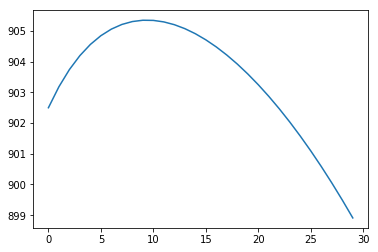

In [27]:
plt.plot(res)